**Importing necessary libraies for this project**

In [1]:
import numpy as np
import pandas as pd
import os
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Kiran\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=dd.read_csv('price_paid_records.csv',parse_dates=[2],blocksize='2410MB')

In [3]:
data

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
npartitions=1,,,,,,,,,,,
,object,int64,datetime64[ns],object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...


 Here we are grabing all the data from the year 2012 only. The whole data sets contain data from 1995-2017. For our analysis we are grabing latest data only which will be data from 2012 onwards.

In [4]:
c_data=data[data['Date of Transfer'].dt.year>2011]

Converting part of the data (2012-2017) into csv file to read again.

In [5]:
c_data.to_csv('data2012up.csv')

['C:/Users/Kiran/Downloads/data2012up.csv\\0.part']

In [6]:
import csv

**Reading new data sets for our analysis**

In [7]:
data_1=dd.read_csv('data2012up.csv/0.part',parse_dates=[3],blocksize='20MB')

In [8]:
data_1.head()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,17612922,{BD0D075D-7818-47B3-9657-7651CBD02219},155000,2012-09-28,S,N,F,YORK,YORK,YORK,A,A
1,17612923,{0FF70080-C8EA-4DDC-9C19-7651D9B540CC},264000,2012-07-18,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,A
2,17612924,{80CC2177-EDBE-4ABB-9EAA-7651DAA0E4EE},20000,2012-04-25,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
3,17612925,{076B2969-50D6-4659-8956-7651ECAAB904},89950,2012-10-25,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A,A
4,17612926,{9A6B1BBC-3522-4B44-9FD6-765202F73E28},168000,2012-04-13,S,N,F,TORQUAY,TORBAY,TORBAY,A,A


In [9]:
%time 
data_1.Price.max().compute()

Wall time: 0 ns


98900000

In [10]:
data_1[data_1['Price']==98900000].compute()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
166165,21906462,{50F18103-E682-9FD5-E050-A8C063054923},98900000,2016-11-24,O,N,F,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A


In [11]:
data_1[data_1['Price']==1].compute()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
99235,21122191,{3E0330EF-8336-8D89-E050-A8C062052140},1,2016-03-18,F,N,L,CARDIFF,CARDIFF,CARDIFF,A,A
34327,21235938,{3E0330EF-9876-8D89-E050-A8C062052140},1,2016-08-09,F,N,L,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A
134032,21695040,{47844C7F-96B6-8986-E050-A8C063056488},1,2016-08-18,F,N,L,BRIXHAM,TORBAY,TORBAY,A,A
139401,21879698,{4E95D757-8518-EDA1-E050-A8C0630539E2},1,2016-04-01,T,N,F,SALFORD,SALFORD,GREATER MANCHESTER,A,A
102421,22022215,{2FD36065-20A0-4BF8-E050-A8C0620562B1},1,2016-02-17,T,N,L,WEMBLEY,BRENT,GREATER LONDON,A,A
170784,22090578,{39140479-B79E-3206-E050-A8C063057647},1,2016-06-17,F,N,L,LYNDHURST,NEW FOREST,HAMPSHIRE,A,A
26680,22304975,{50F18103-7165-9FD5-E050-A8C063054923},1,2017-03-03,F,N,F,STOKE-ON-TRENT,STOKE-ON-TRENT,STOKE-ON-TRENT,A,A
101626,22379921,{4E95D757-6007-EDA1-E050-A8C0630539E2},1,2017-03-30,S,N,F,SOUTHEND-ON-SEA,ROCHFORD,ESSEX,A,A


# Doing descriptive analysis for each columns. 

In [12]:
# Checking the descriptive statistics for price only. 
data_1.Price.describe().compute()

count    4.876426e+06
mean     2.836319e+05
std      7.730198e+05
min      1.000000e+00
25%      1.460000e+05
50%      2.249950e+05
75%      3.500000e+05
max      9.890000e+07
Name: Price, dtype: float64

In [13]:
data_1['Price'].value_counts().head()

250000    78105
125000    62378
150000    45186
120000    43326
160000    41255
Name: Price, dtype: int64

In [14]:
data_1['Price'].value_counts().tail()

386120    1
386107    1
386088    1
386084    1
284655    1
Name: Price, dtype: int64

In [15]:
upper_limit = data_1.Price.mean() + 3*data_1.Price.std()

In [16]:
upper_limit.compute()

2602691.3383152117

In [17]:
lower_limit = data_1.Price.mean() -  3*data_1.Price.std()

In [18]:
lower_limit.compute()

-2035427.6011236703

**Removing Outliers**

We are using Z-Score to remove our outliers from the data sets. we are keeping Z score which are less or equal to 3. Below is the formula for Z-score 
 
$$z=\frac{x-\mu}{\sigma}$$

- $Z$ = standard score
- $x$ = observed value
- $\mu$ = mean of the sample
- $\sigma$ = standard deviation of the sample


In [19]:
from scipy import stats

In [20]:
test = data_1.compute()

In [21]:
z = np.abs(stats.zscore(test['Price']))

In [22]:
print(z)

[0.16640179 0.02539634 0.34104157 ... 0.01246006 0.32034352 0.17933807]


In [23]:
z.max()

127.57289694025548

In [24]:
z.min()

8.885407939751427e-06

In [25]:
z.mean()

0.22756214708645786

In [27]:
x = np.where(z<=3)

In [32]:
data_1['z_score']= (data_1.Price - data_1.Price.mean()) / data_1.Price.std()


In [34]:
data_1['z_score'].compute()

0       -0.166402
1       -0.025396
2       -0.341042
3       -0.250552
4       -0.149585
           ...   
31306   -0.140529
31307    0.392374
31308   -0.012460
31309   -0.320343
31310   -0.179338
Name: z_score, Length: 4876426, dtype: float64

In [35]:
data_1.head()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,z_score
0,17612922,{BD0D075D-7818-47B3-9657-7651CBD02219},155000,2012-09-28,S,N,F,YORK,YORK,YORK,A,A,-0.166402
1,17612923,{0FF70080-C8EA-4DDC-9C19-7651D9B540CC},264000,2012-07-18,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,A,-0.025396
2,17612924,{80CC2177-EDBE-4ABB-9EAA-7651DAA0E4EE},20000,2012-04-25,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A,-0.341042
3,17612925,{076B2969-50D6-4659-8956-7651ECAAB904},89950,2012-10-25,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A,A,-0.250552
4,17612926,{9A6B1BBC-3522-4B44-9FD6-765202F73E28},168000,2012-04-13,S,N,F,TORQUAY,TORBAY,TORBAY,A,A,-0.149585


In [36]:
data_1['z_score'].max().compute()

127.57288385968145

In [41]:
data_1['z_score'].min().compute()

-0.3669128010288813

In [42]:
data_1[data_1['z_score']>-0.3].compute()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,z_score
0,17612922,{BD0D075D-7818-47B3-9657-7651CBD02219},155000,2012-09-28,S,N,F,YORK,YORK,YORK,A,A,-0.166402
1,17612923,{0FF70080-C8EA-4DDC-9C19-7651D9B540CC},264000,2012-07-18,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,A,-0.025396
3,17612925,{076B2969-50D6-4659-8956-7651ECAAB904},89950,2012-10-25,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A,A,-0.250552
4,17612926,{9A6B1BBC-3522-4B44-9FD6-765202F73E28},168000,2012-04-13,S,N,F,TORQUAY,TORBAY,TORBAY,A,A,-0.149585
5,17612927,{7DAF511C-49BA-4F8B-812A-72BF7A4C71EB},280000,2012-07-06,S,N,F,WHITCHURCH,CHESHIRE EAST,CHESHIRE EAST,A,A,-0.004698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31305,22489342,{4C4EE000-2919-1854-E050-A8C063054F34},103000,2017-02-09,S,N,F,PONTEFRACT,WAKEFIELD,WEST YORKSHIRE,A,A,-0.233670
31306,22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,-0.140529
31307,22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,0.392374
31308,22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,-0.012460


In [45]:
data_1[data_1['Price']==1].compute()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,z_score
99235,21122191,{3E0330EF-8336-8D89-E050-A8C062052140},1,2016-03-18,F,N,L,CARDIFF,CARDIFF,CARDIFF,A,A,-0.366913
34327,21235938,{3E0330EF-9876-8D89-E050-A8C062052140},1,2016-08-09,F,N,L,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A,-0.366913
134032,21695040,{47844C7F-96B6-8986-E050-A8C063056488},1,2016-08-18,F,N,L,BRIXHAM,TORBAY,TORBAY,A,A,-0.366913
139401,21879698,{4E95D757-8518-EDA1-E050-A8C0630539E2},1,2016-04-01,T,N,F,SALFORD,SALFORD,GREATER MANCHESTER,A,A,-0.366913
102421,22022215,{2FD36065-20A0-4BF8-E050-A8C0620562B1},1,2016-02-17,T,N,L,WEMBLEY,BRENT,GREATER LONDON,A,A,-0.366913
170784,22090578,{39140479-B79E-3206-E050-A8C063057647},1,2016-06-17,F,N,L,LYNDHURST,NEW FOREST,HAMPSHIRE,A,A,-0.366913
26680,22304975,{50F18103-7165-9FD5-E050-A8C063054923},1,2017-03-03,F,N,F,STOKE-ON-TRENT,STOKE-ON-TRENT,STOKE-ON-TRENT,A,A,-0.366913
101626,22379921,{4E95D757-6007-EDA1-E050-A8C0630539E2},1,2017-03-30,S,N,F,SOUTHEND-ON-SEA,ROCHFORD,ESSEX,A,A,-0.366913


To remove outliers we have decided to drop all the rows which price is less than 4000. Anything over 4000, we are keeping in pur data. In our data sets there were over 2000 inputs were outliers. After removing outlier, input of our data is decresed by 2000 rows.

In [61]:
data_1=data_1[data_1.Price>=4000]

In [62]:
data_1.Price.describe().compute()

count    4.874262e+06
mean     2.837570e+05
std      7.731686e+05
min      4.000000e+03
25%      1.465000e+05
50%      2.250000e+05
75%      3.500000e+05
max      9.890000e+07
Name: Price, dtype: float64

There are five kinds of unique property types: 

- D = Detached,
- S = Semi-Detached,
- T = Terraced,
- F = Flats/Maisonettes,
- O = Other

In [28]:
# Before removing outliers
data_1['Property Type'].describe().compute()

unique          5
count     4876426
top             T
freq      1411635
Name: Property Type, dtype: object

In [63]:
# after removing outliers
data_1['Property Type'].describe().compute()

unique          5
count     4874262
top             T
freq      1411594
Name: Property Type, dtype: object

In [29]:
# before removing outliers
data_1['Property Type'].unique().compute()

0    S
1    D
2    T
3    F
4    O
Name: Property Type, dtype: object

In [64]:
# after removing outliers
data_1['Property Type'].unique().compute()

0    S
1    D
2    T
3    F
4    O
Name: Property Type, dtype: object

Text(0, 0.5, 'count')

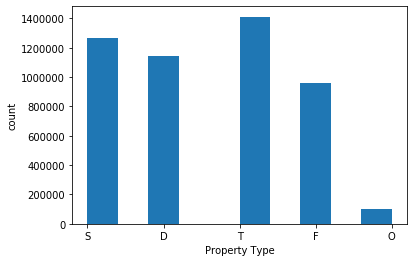

In [30]:
# before removing outliers
plt.hist(data_1['Property Type'])
plt.xlabel('Property Type')
plt.ylabel('count')

Text(0, 0.5, 'count')

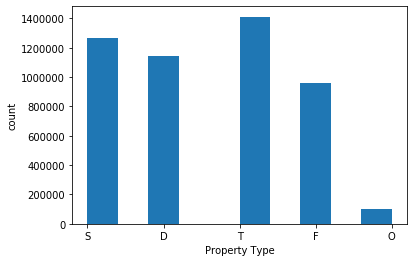

In [65]:
# after removing outliers
plt.hist(data_1['Property Type'])
plt.xlabel('Property Type')
plt.ylabel('count')

In [31]:
# before removing outliers
data_1['Property Type'].value_counts().compute()

T    1411635
S    1266366
D    1141116
F     957007
O     100302
Name: Property Type, dtype: int64

In [66]:
# after removing outliers
data_1['Property Type'].value_counts().compute()

T    1411594
S    1266345
D    1141107
F     956980
O      98236
Name: Property Type, dtype: int64

**From here we can see how many properties are newely built.**

Indicates the age of the property and applies to all price paid transactions, residential and non-residential.

- Y = a newly built property,
- N = an established residential building

In [46]:
# before removing outliers
data_1['Old/New'].describe().compute()

unique          2
count     4876426
top             N
freq      4391388
Name: Old/New, dtype: object

In [67]:
# after removing outliers
data_1['Old/New'].describe().compute()

unique          2
count     4874262
top             N
freq      4389297
Name: Old/New, dtype: object

Text(0, 0.5, 'count')

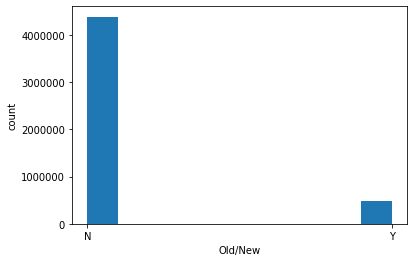

In [47]:
# before removing outliers
plt.hist(data_1['Old/New'])
plt.xlabel('Old/New')
plt.ylabel('count')

Text(0, 0.5, 'count')

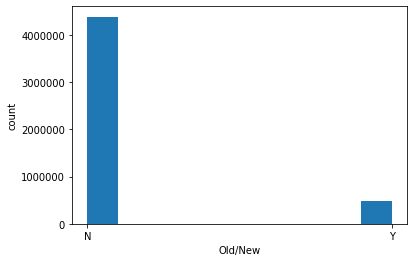

In [68]:
# after removing outliers
plt.hist(data_1['Old/New'])
plt.xlabel('Old/New')
plt.ylabel('count')

In [48]:
#before removing outliers
data_1['Old/New'].value_counts().compute()

N    4391388
Y     485038
Name: Old/New, dtype: int64

In [69]:
# after removing outliers
data_1['Old/New'].value_counts().compute()

N    4389297
Y     484965
Name: Old/New, dtype: int64

**This column show the duration of each property tenant holds**

Relates to the tenure:

- F = Freehold,
- L= Leasehold 

In [ ]:
plt.hist(data_1['Duration'])
plt.xlabel('Duration')
plt.ylabel('Count')

In [49]:
# With outliers
data_1['Duration'].describe().compute()

unique          2
count     4876426
top             F
freq      3659583
Name: Duration, dtype: object

In [70]:
# After removing outliers
data_1['Duration'].describe().compute()

unique          2
count     4874262
top             F
freq      3658226
Name: Duration, dtype: object

Text(0, 0.5, 'Count')

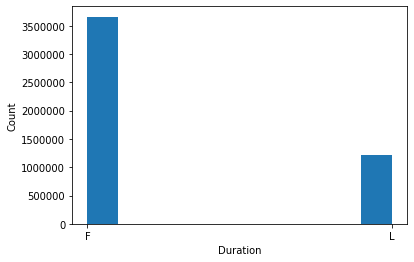

In [50]:
# With outliers
plt.hist(data_1['Duration'])
plt.xlabel('Duration')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

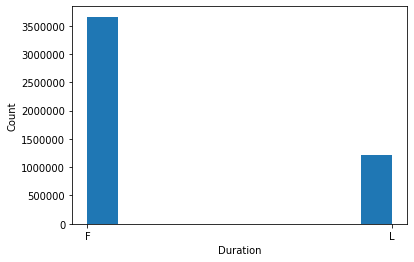

In [71]:
# After removing outliers
plt.hist(data_1['Duration'])
plt.xlabel('Duration')
plt.ylabel('Count')

In [51]:
# before removing outliers
data_1['Duration'].value_counts().compute()

F    3659583
L    1216843
Name: Duration, dtype: int64

In [72]:
# after removing outliers
data_1['Duration'].value_counts().compute()

F    3658226
L    1216036
Name: Duration, dtype: int64

 This column shows the Town/City where property are located. And shows there are 1151 Town/City where property are situated in UK.

In [52]:
# With Outliers
data_1['Town/City'].describe().compute()

unique       1151
count     4876426
top        LONDON
freq       381949
Name: Town/City, dtype: object

In [73]:
# after removing outliers
data_1['Town/City'].describe().compute()

unique       1151
count     4874262
top        LONDON
freq       381726
Name: Town/City, dtype: object

In [53]:
# Before Outliers
data_1['Town/City'].value_counts().compute()

LONDON           381949
BRISTOL           79066
MANCHESTER        76813
BIRMINGHAM        67999
NOTTINGHAM        65055
                  ...  
NEWCASTLETON          9
MINDRUM               9
GATWICK               5
GRETNA                1
PORT DINORWIC         1
Name: Town/City, Length: 1151, dtype: int64

In [74]:
# After outliers
data_1['Town/City'].value_counts().compute()

LONDON           381726
BRISTOL           79027
MANCHESTER        76761
BIRMINGHAM        67986
NOTTINGHAM        65025
                  ...  
NEWCASTLETON          9
MINDRUM               9
GATWICK               5
GRETNA                1
PORT DINORWIC         1
Name: Town/City, Length: 1151, dtype: int64

In [54]:
# Before removing outliers
data_1['District'].describe().compute()

unique           349
count        4876426
top       BIRMINGHAM
freq           67471
Name: District, dtype: object

In [75]:
# After outliers
data_1['District'].describe().compute()

unique           349
count        4874262
top       BIRMINGHAM
freq           67456
Name: District, dtype: object

In [55]:
# Before Outliers
data_1['District'].value_counts().compute()

BIRMINGHAM         67471
LEEDS              64684
CORNWALL           55319
WILTSHIRE          46290
CITY OF BRISTOL    41594
                   ...  
MERTHYR TYDFIL      3811
WEST SOMERSET       3570
CITY OF LONDON      1817
ISLES OF SCILLY      108
MACCLESFIELD           1
Name: District, Length: 349, dtype: int64

In [76]:
# after removing outliers
data_1['District'].value_counts().compute()

BIRMINGHAM         67456
LEEDS              64669
CORNWALL           55300
WILTSHIRE          46273
CITY OF BRISTOL    41572
                   ...  
MERTHYR TYDFIL      3806
WEST SOMERSET       3566
CITY OF LONDON      1815
ISLES OF SCILLY      108
MACCLESFIELD           1
Name: District, Length: 349, dtype: int64

In [56]:
# Before removing outliers
data_1['County'].describe().compute()

unique               113
count            4876426
top       GREATER LONDON
freq              630886
Name: County, dtype: object

In [77]:
# after removing outliers
data_1['County'].describe().compute()

unique               113
count            4874262
top       GREATER LONDON
freq              630522
Name: County, dtype: object

In [57]:
# Before removing the outliers
data_1['County'].value_counts().compute()

GREATER LONDON        630886
GREATER MANCHESTER    207497
WEST MIDLANDS         181430
WEST YORKSHIRE        176755
KENT                  146347
                       ...  
BLAENAU GWENT           4133
RUTLAND                 3956
MERTHYR TYDFIL          3811
ISLES OF SCILLY          108
CHESHIRE                   1
Name: County, Length: 113, dtype: int64

In [78]:
# after removing the outliers
data_1['County'].value_counts().compute()

GREATER LONDON        630522
GREATER MANCHESTER    207297
WEST MIDLANDS         181388
WEST YORKSHIRE        176696
KENT                  146286
                       ...  
BLAENAU GWENT           4131
RUTLAND                 3956
MERTHYR TYDFIL          3806
ISLES OF SCILLY          108
CHESHIRE                   1
Name: County, Length: 113, dtype: int64

**This cloumn shows how the payment type, there are two types of payments A and B**

PPD Category Type: Indicates the type of Price Paid transaction.

- A = Standard Price Paid entry, includes single residential property sold for full market value.
- B = Additional Price Paid entry including transfers under a power of sale/repossessions (*)

In [58]:
# Before removing the outliers
data_1['PPDCategory Type'].describe().compute()

unique          2
count     4876426
top             A
freq      4528873
Name: PPDCategory Type, dtype: object

In [79]:
# After removing the outliers
data_1['PPDCategory Type'].describe().compute()

unique          2
count     4874262
top             A
freq      4528850
Name: PPDCategory Type, dtype: object

Text(0, 0.5, 'Count')

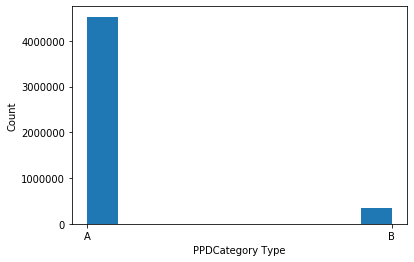

In [59]:
# Before removing the outliers
plt.hist(data_1['PPDCategory Type'])
plt.xlabel('PPDCategory Type')
plt.ylabel('Count')

In [60]:
# Before removing the outliers
data_1['PPDCategory Type'].value_counts().compute()

A    4528873
B     347553
Name: PPDCategory Type, dtype: int64

In [80]:
# after removing the outliers
data_1['PPDCategory Type'].value_counts().compute()

A    4528850
B     345412
Name: PPDCategory Type, dtype: int64